<a href="https://colab.research.google.com/github/iamharkirat/STP-540-Computational-Statistics/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.9309517906861541


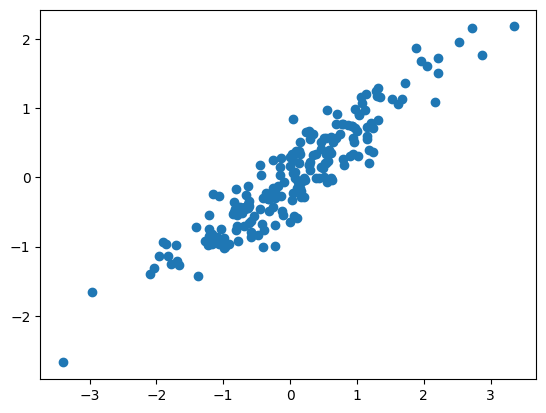

MLE from LogisticRegression: [0.77919824 3.35221211]


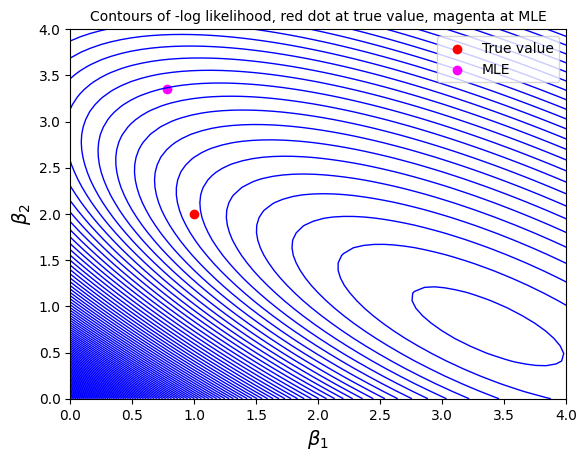

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import expit
from sklearn.linear_model import LogisticRegression


def simData(X, beta):
    eta = np.dot(X, beta)
    p = expit(eta)
    y = np.random.binomial(1, p, size=len(p))
    return y


def log_likelihood(X, y, beta):
    eta = np.dot(X, beta)
    p = expit(eta)
    return -np.sum(y * np.log(p + 1e-9) + (1 - y) * np.log(1 - p + 1e-9))


n = 200
beta = np.array([1, 2])
p = len(beta)

np.random.seed(17)
x1 = norm.rvs(size=n)
wht = 0.7
x2 = wht * x1 + (1 - wht) * norm.rvs(size=n)
print(np.corrcoef(x1, x2)[0, 1])

X = np.column_stack((x1, x2))
y = simData(X, beta)

plt.scatter(x1, x2)
plt.show()

ddf = pd.DataFrame(np.column_stack((X, y)), columns=['x1', 'x2', 'y'])
lgm = LogisticRegression(fit_intercept=False, C=1e9).fit(ddf[['x1', 'x2']], ddf['y'])
bhat = lgm.coef_[0]

print("MLE from LogisticRegression:", bhat)

gs = 50
alga1 = np.linspace(-0, 4.0, gs)
alga2 = np.linspace(-0, 4.0, gs)
alg2 = np.array(np.meshgrid(alga1, alga2)).T.reshape(-1, 2)

llv = np.zeros(len(alg2))

for i in range(len(llv)):
    llv[i] = log_likelihood(X, y, alg2[i])

llmat = llv.reshape(gs, gs)

plt.contour(alga1, alga2, llmat, levels=100, linewidths=1, colors='blue')
plt.xlabel(r'$\beta_1$', fontsize=14)
plt.ylabel(r'$\beta_2$', fontsize=14)
plt.scatter(beta[0], beta[1], c='red', marker='o', label='True value')
plt.scatter(bhat[0], bhat[1], c='magenta', marker='o', label='MLE')
plt.legend()
plt.title("Contours of -log likelihood, red dot at true value, magenta at MLE", fontsize=10)
plt.show()


## Stochatic Gradient Descent

SGD estimates: [0.97244971 3.44524134]


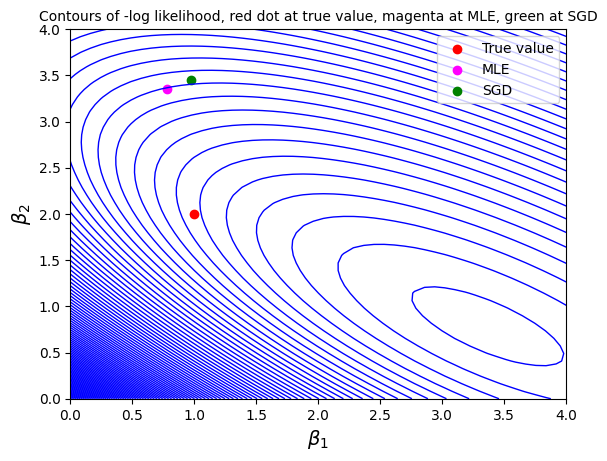

In [24]:
def sgd(X, y, learning_rate=5, epochs=50, batch_size=10):
    n, p = X.shape
    beta = np.zeros(p)

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(n)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            eta = np.dot(X_batch, beta)
            p = expit(eta)
            gradient = np.dot(X_batch.T, (p - y_batch)) / batch_size
            beta -= learning_rate * gradient

    return beta

beta_sgd = sgd(X, y)
print("SGD estimates:", beta_sgd)

gs = 50
alga1 = np.linspace(-0, 4.0, gs)
alga2 = np.linspace(-0, 4.0, gs)
alg2 = np.array(np.meshgrid(alga1, alga2)).T.reshape(-1, 2)

llv = np.zeros(len(alg2))

for i in range(len(llv)):
    llv[i] = log_likelihood(X, y, alg2[i])

llmat = llv.reshape(gs, gs)

plt.contour(alga1, alga2, llmat, levels=100, linewidths=1, colors='blue')
plt.xlabel(r'$\beta_1$', fontsize=14)
plt.ylabel(r'$\beta_2$', fontsize=14)
plt.scatter(beta[0], beta[1], c='red', marker='o', label='True value')
plt.scatter(bhat[0], bhat[1], c='magenta', marker='o', label='MLE')
plt.scatter(beta_sgd[0], beta_sgd[1], c='green', marker='o', label='SGD')
plt.legend()
plt.title("Contours of -log likelihood, red dot at true value, magenta at MLE, green at SGD", fontsize=10)
plt.show()


## SGD with Momentum

SGD estimates (without momentum): [0.55984832 3.33981282]
SGD estimates (with momentum): [2.84587517 2.27558298]


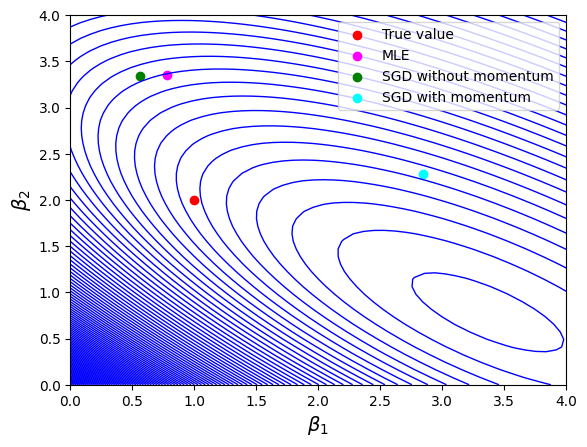

In [41]:
def sgd_momentum(X, y, learning_rate=5, gamma=0.9, epochs=50, batch_size=10):
    n, p = X.shape
    beta = np.zeros(p)
    v = np.zeros(p)

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(n)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            eta = np.dot(X_batch, beta)
            p = expit(eta)
            gradient = np.dot(X_batch.T, (p - y_batch)) / batch_size
            v = gamma * v + learning_rate * gradient
            beta -= v

    return beta

# Without momentum
beta_sgd = sgd(X, y)
print("SGD estimates (without momentum):", beta_sgd)

# With momentum
beta_sgd_momentum = sgd_momentum(X, y)
print("SGD estimates (with momentum):", beta_sgd_momentum)

gs = 50
alga1 = np.linspace(-0, 4.0, gs)
alga2 = np.linspace(-0, 4.0, gs)
alg2 = np.array(np.meshgrid(alga1, alga2)).T.reshape(-1, 2)

llv = np.zeros(len(alg2))

for i in range(len(llv)):
    llv[i] = log_likelihood(X, y, alg2[i])

llmat = llv.reshape(gs, gs)

plt.contour(alga1, alga2, llmat, levels=100, linewidths=1, colors='blue')
plt.xlabel(r'$\beta_1$', fontsize=14)
plt.ylabel(r'$\beta_2$', fontsize=14)
plt.scatter(beta[0], beta[1], c='red', marker='o', label='True value')
plt.scatter(bhat[0], bhat[1], c='magenta', marker='o', label='MLE')
plt.scatter(beta_sgd[0], beta_sgd[1], c='green', marker='o', label='SGD without momentum')
plt.scatter(beta_sgd_momentum[0], beta_sgd_momentum[1], c='cyan', marker='o', label='SGD with momentum')
plt.legend()
plt.show()


### Hyperparameter Tuning

In [37]:
from itertools import product

def hyperparameter_tuning(X, y, learning_rates, gammas, epoch_values, batch_sizes):
    best_params = None
    best_ll = float('inf')
    best_beta = None

    for lr, gamma, epochs, batch_size in product(learning_rates, gammas, epoch_values, batch_sizes):
        beta = sgd_momentum(X, y, learning_rate=lr, gamma=gamma, epochs=epochs, batch_size=batch_size)
        ll = log_likelihood(X, y, beta)

        if ll < best_ll:
            best_ll = ll
            best_params = (lr, gamma, epochs, batch_size)
            best_beta = beta

    return best_params, best_beta, best_ll

# Define the hyperparameters to try
learning_rates = [0.01, 0.1, 1, 5]
gammas = [0.5, 0.7, 0.9]
epoch_values = [10, 50, 100, 500, 1000]
batch_sizes = [5, 10, 20, 50]

# Perform hyperparameter tuning
best_params, best_beta, best_ll = hyperparameter_tuning(X, y, learning_rates, gammas, epoch_values, batch_sizes)

print("Best hyperparameters:", best_params)
print("Best beta:", best_beta)
print("Best log-likelihood:", best_ll)


Best hyperparameters: (0.01, 0.7, 1000, 5)
Best beta: [0.78034159 3.35131963]
Best log-likelihood: 65.34456552375892


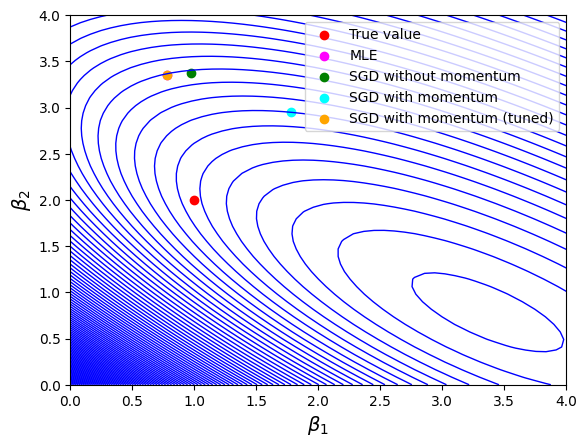

In [39]:
# Train the model with the best hyperparameters
best_lr, best_gamma, best_epochs, best_batch_size = best_params
best_sgd_momentum_beta = sgd_momentum(X, y, learning_rate=best_lr, gamma=best_gamma, epochs=best_epochs, batch_size=best_batch_size)

# Plot the results
plt.contour(alga1, alga2, llmat, levels=100, linewidths=1, colors='blue')
plt.xlabel(r'$\beta_1$', fontsize=14)
plt.ylabel(r'$\beta_2$', fontsize=14)
plt.scatter(beta[0], beta[1], c='red', marker='o', label='True value')
plt.scatter(bhat[0], bhat[1], c='magenta', marker='o', label='MLE')
plt.scatter(beta_sgd[0], beta_sgd[1], c='green', marker='o', label='SGD without momentum')
plt.scatter(beta_sgd_momentum[0], beta_sgd_momentum[1], c='cyan', marker='o', label='SGD with momentum')
plt.scatter(best_sgd_momentum_beta[0], best_sgd_momentum_beta[1], c='orange', marker='o', label='SGD with momentum (tuned)')
plt.legend()
plt.show()


## Newtons Method

In [42]:
def newton(X, y, tol=1e-6, max_iter=100):
    n, p = X.shape
    beta = np.zeros(p)
    ll_old = -np.inf

    for _ in range(max_iter):
        eta = np.dot(X, beta)
        p = expit(eta)
        gradient = np.dot(X.T, (p - y))
        hessian = np.dot(X.T, (p * (1 - p))[:, None] * X)
        beta -= np.linalg.solve(hessian, gradient)

        ll_new = log_likelihood(X, y, beta)
        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return beta

beta_newton = newton(X, y)
print("Newton's method estimates:", beta_newton)


Newton's method estimates: [0.77919101 3.35221198]


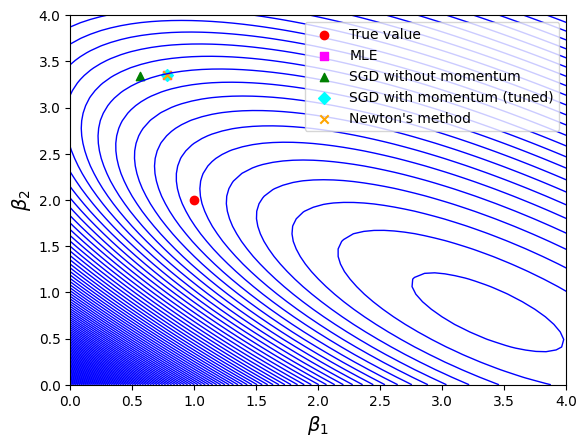

In [46]:
plt.contour(alga1, alga2, llmat, levels=100, linewidths=1, colors='blue')
plt.xlabel(r'$\beta_1$', fontsize=14)
plt.ylabel(r'$\beta_2$', fontsize=14)
plt.scatter(beta[0], beta[1], c='red', marker='o', label='True value')
plt.scatter(bhat[0], bhat[1], c='magenta', marker='s', label='MLE')
plt.scatter(beta_sgd[0], beta_sgd[1], c='green', marker='^', label='SGD without momentum')
plt.scatter(best_sgd_momentum_beta[0], best_sgd_momentum_beta[1], c='cyan', marker='D', label='SGD with momentum (tuned)')
plt.scatter(beta_newton[0], beta_newton[1], c='orange', marker='x', label="Newton's method")
plt.legend()
plt.show()


## PROBLEM 1
* code up stochastic gradient descent for the logit problem. Try it on a problem with several x features.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# simulate data
np.random.seed(123)
n = 1000
p = 3
X = np.random.randn(n, p)
beta_true = np.random.randn(p)
y = np.random.binomial(1, 1 / (1 + np.exp(-X @ beta_true)))

# define logit function
def logit(X, beta):
    return 1 / (1 + np.exp(-X @ beta))

# stochastic gradient descent
def sgd_logit(X, y, alpha=0.1, epochs=100):
    n, p = X.shape
    beta = np.zeros(p)
    beta_hist = np.zeros((epochs, p))
    for epoch in range(epochs):
        for i in range(n):
            xi = X[i, :]
            yi = y[i]
            grad = (yi - logit(xi, beta)) * xi
            beta += alpha * grad
        beta_hist[epoch, :] = beta
    return beta, beta_hist

# run stochastic gradient descent
beta_hat, beta_hist = sgd_logit(X, y)

# print results
print("True beta: ", beta_true)
print("Estimated beta: ", beta_hat)

True beta:  [-0.45059869  0.60959032  1.17374438]
Estimated beta:  [-0.54946233  0.65910012  1.70198771]


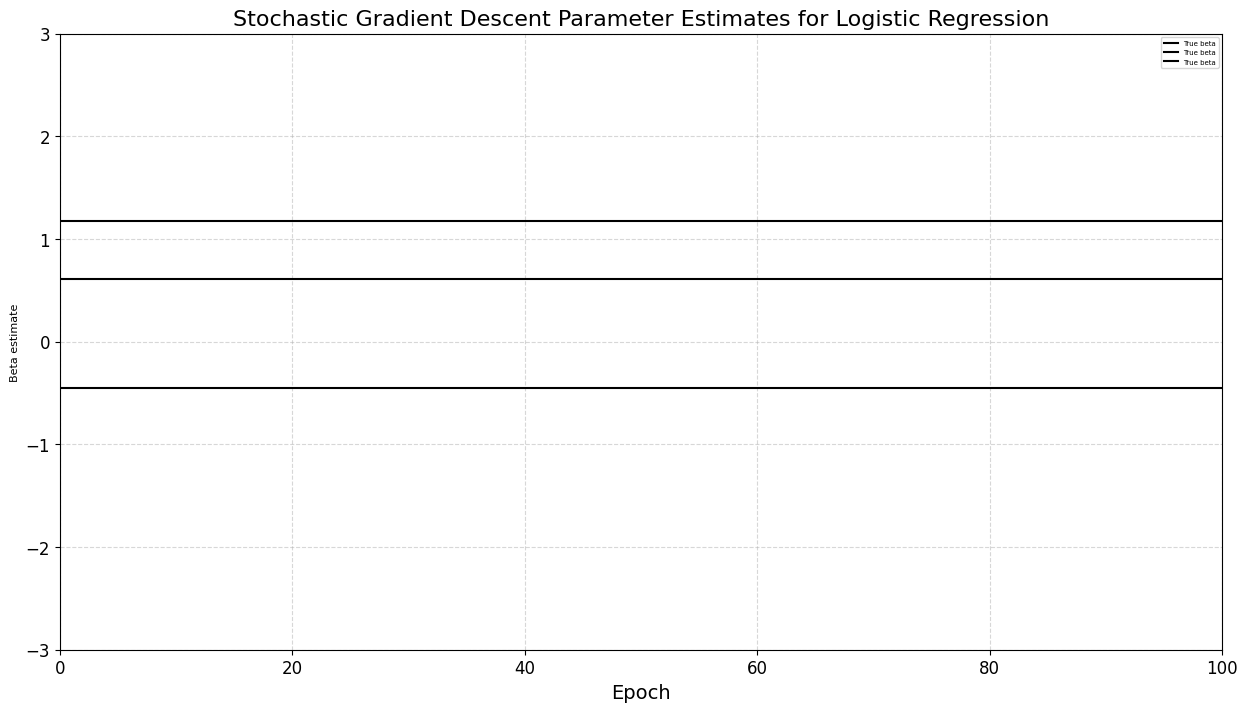

In [ ]:
# plot parameter estimates over epochs
plt.figure(figsize=(15, 8))

# plot true beta values
plt.plot([0, 100], [beta_true, beta_true], 'k-', linewidth=1.5, label='True beta')

# add separate legends for each method
plt.legend(loc='upper right', fontsize=5)
plt.xlim(0, 100)
plt.ylim(-3, 3)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Beta estimate', fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.5, linestyle='--')
plt.title('Stochastic Gradient Descent Parameter Estimates for Logistic Regression', fontsize=16)
plt.show()

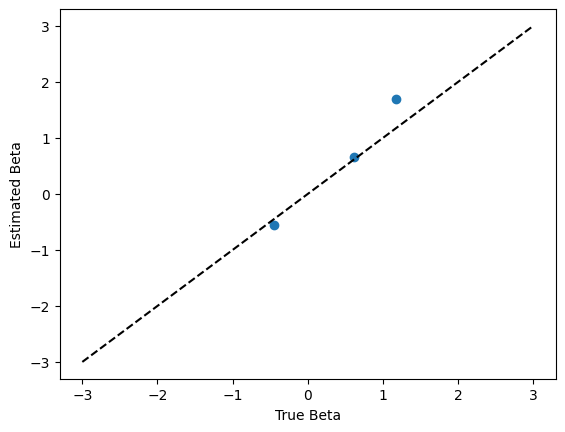

In [ ]:
# plot true beta vs estimated beta
fig, ax = plt.subplots()
ax.scatter(beta_true, beta_hat)
ax.plot([-3, 3], [-3, 3], color="black", linestyle="--")
ax.set_xlabel("True Beta")
ax.set_ylabel("Estimated Beta")
plt.show()

## PROBLEM 2
* code up stochastic gradient descent for the logit problem with momentum. Compare with what you got in the previous part.
code up Newton’s method for the logit problem. Compare with what you got in the previous two parts.

In [ ]:
# To implement stochastic gradient descent with momentum, we need to modify the 
# sgd_logit function to include an additional parameter for the momentum coefficient 
# and initialize a variable to store the momentum for each parameter. 

def sgd_logit_momentum(X, y, alpha=0.1, epochs=100, momentum=0.9):
    n, p = X.shape
    beta = np.zeros(p)
    beta_hist = np.zeros((epochs, p))
    v = np.zeros(p)  # initialize momentum
    for epoch in range(epochs):
        for i in range(n):
            xi = X[i, :]
            yi = y[i]
            grad = (yi - logit(xi, beta)) * xi
            v = momentum * v + (1 - momentum) * grad  # update momentum
            beta += alpha * v  # update parameter estimates with momentum
        beta_hist[epoch, :] = beta
    return beta, beta_hist

In [ ]:
# run stochastic gradient descent with momentum
beta_hat_mom, beta_hist_mom = sgd_logit_momentum(X, y)

# compare parameter estimates
print("True beta: ", beta_true)
print("Estimated beta without momentum: ", beta_hat)
print("Estimated beta with momentum: ", beta_hat_mom)

True beta:  [-0.45059869  0.60959032  1.17374438]
Estimated beta without momentum:  [-0.54946233  0.65910012  1.70198771]
Estimated beta with momentum:  [-0.51880105  0.61903787  1.61140109]


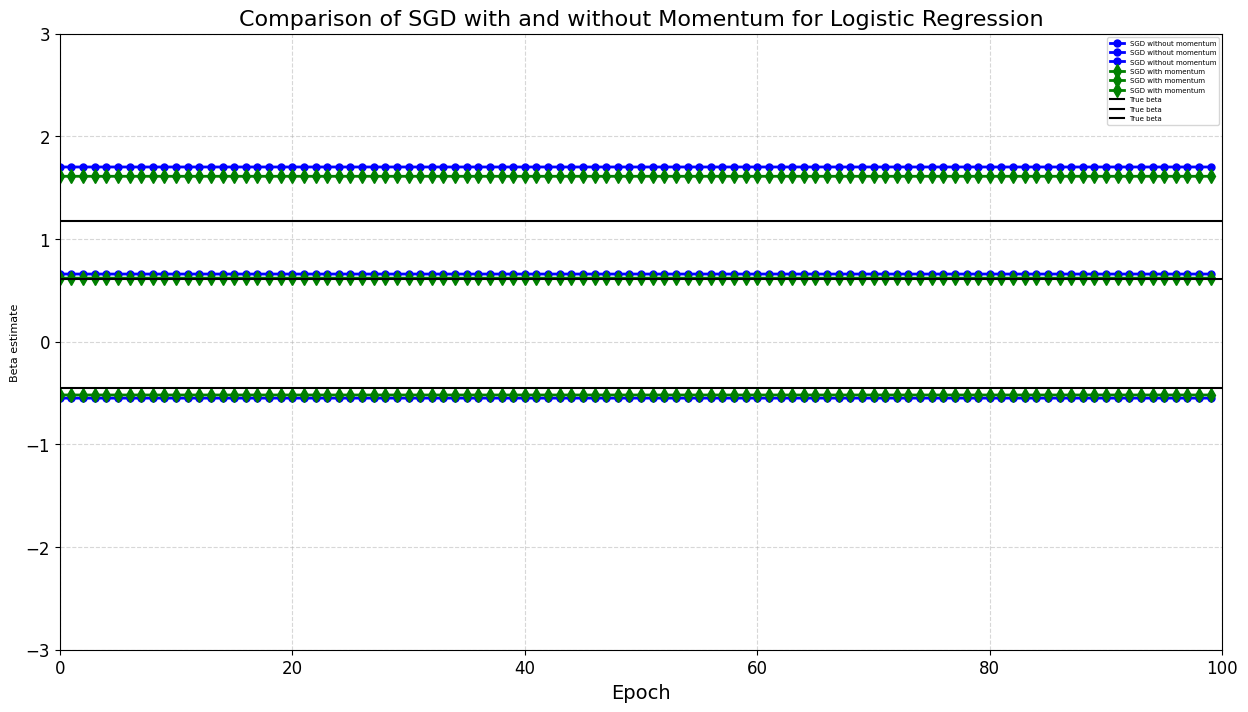

In [ ]:
# plot parameter estimates over epochs
plt.figure(figsize=(15, 8))

# plot beta estimates 
plt.plot(beta_hist, linewidth=2, linestyle='-', color='blue', marker='o', markersize=5, label='SGD without momentum')
plt.plot(beta_hist_mom, linewidth=2, linestyle='-', color='green', marker='d', markersize=7, label='SGD with momentum')

# plot true beta values
plt.plot([0, 100], [beta_true, beta_true], 'k-', linewidth=1.5, label='True beta')

# add separate legends for each method
plt.legend(loc='upper right', fontsize=5)
plt.xlim(0, 100)
plt.ylim(-3, 3)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Beta estimate', fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.5, linestyle='--')
plt.title('Comparison of SGD with and without Momentum for Logistic Regression', fontsize=16)
plt.show()

## PROBLEM 3
* code up Newton’s method for the logit problem. Compare with what you got in the previous two parts.

In [ ]:
# Newton's method
def newton_logit(X, y, max_iter=100):
    n, p = X.shape
    beta = np.zeros(p)
    beta_hist = np.zeros((max_iter, p))
    for i in range(max_iter):
        mu = logit(X, beta)
        grad = X.T @ (y - mu)
        H = X.T @ np.diag(mu * (1 - mu)) @ X
        beta += np.linalg.solve(H, grad)
        beta_hist[i, :] = beta
    return beta, beta_hist

# run Newton's method
beta_hat_newton, beta_hist_newton = newton_logit(X, y)

# print results
print("True beta: ", beta_true)
print("Estimated beta (SGD): ", beta_hat)
print("Estimated beta (SGD with momentum): ", beta_hat_mom)
print("Estimated beta (Newton's method): ", beta_hat_newton)

True beta:  [ 1 -2]
Estimated beta (SGD):  [ 0.6425108  -0.28506019]
Estimated beta (SGD with momentum):  [-0.51880105  0.61903787  1.61140109]
Estimated beta (Newton's method):  [ 0.9111951  -1.92997309]


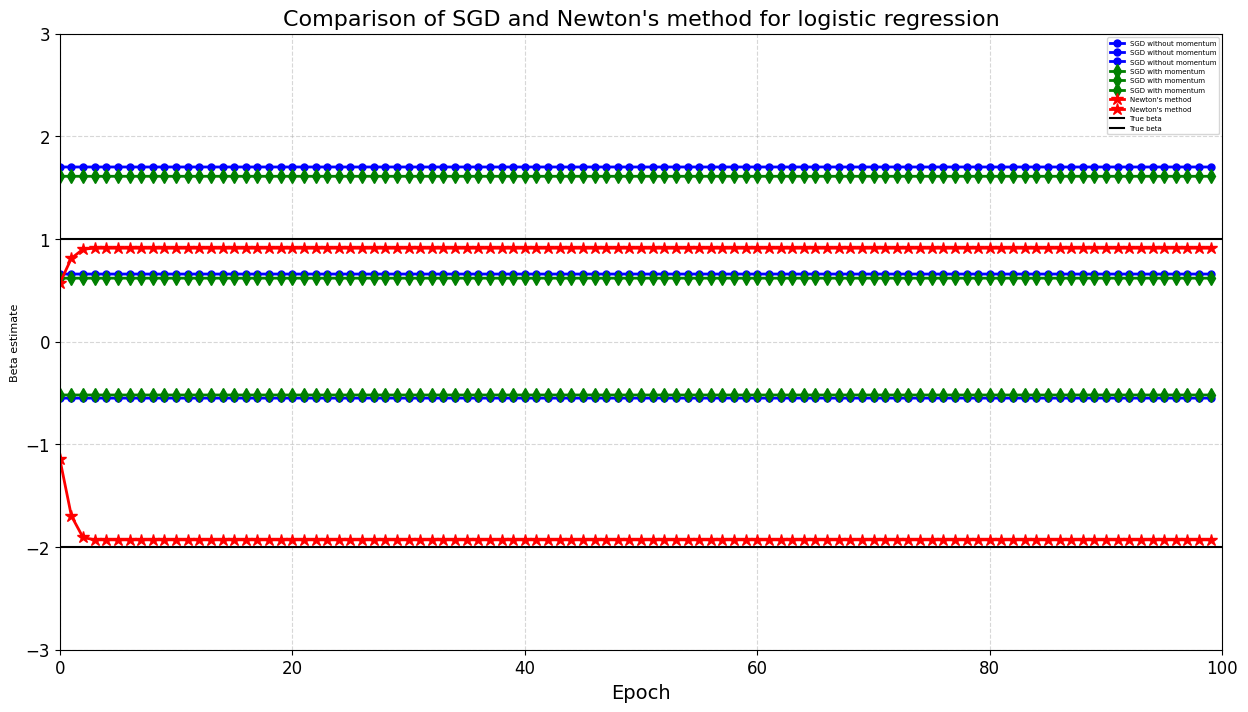

In [ ]:
# plot parameter estimates over epochs
plt.figure(figsize=(15, 8))

# plot beta estimates 
plt.plot(beta_hist, linewidth=2, linestyle='-', color='blue', marker='o', markersize=5, label='SGD without momentum')
plt.plot(beta_hist_mom, linewidth=2, linestyle='-', color='green', marker='d', markersize=7, label='SGD with momentum')
plt.plot(beta_hist_newton, linewidth=2, linestyle='-', color='red', marker='*', markersize=9, label="Newton's method")

# plot true beta values
plt.plot([0, 100], [beta_true, beta_true], 'k-', linewidth=1.5, label='True beta')

# add separate legends for each method
plt.legend(loc='upper right', fontsize=5)
plt.xlim(0, 100)
plt.ylim(-3, 3)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Beta estimate', fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.5, linestyle='--')
plt.title('Comparison of SGD and Newton\'s method for logistic regression', fontsize=16)
plt.show()